In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
import time
from datetime import datetime
from config import weather_api_key

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | luanda
Processing Record 3 of Set 1 | colac
Processing Record 4 of Set 1 | khani
Processing Record 5 of Set 1 | dharchula
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | aflu
City not found. Skipping...
Processing Record 8 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | manado
Processing Record 13 of Set 1 | bismil
Processing Record 14 of Set 1 | naze
Processing Record 15 of Set 1 | oroville
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | pendencias
Processing Record 18 of Set 1 | rio gallegos
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | samusu
City not found. Skipping...
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Set 1 | idah
Processin

Processing Record 39 of Set 4 | hofn
Processing Record 40 of Set 4 | at-bashi
Processing Record 41 of Set 4 | karratha
Processing Record 42 of Set 4 | sao miguel do araguaia
Processing Record 43 of Set 4 | vestmannaeyjar
Processing Record 44 of Set 4 | provideniya
Processing Record 45 of Set 4 | avera
Processing Record 46 of Set 4 | leningradskiy
Processing Record 47 of Set 4 | acapulco
Processing Record 48 of Set 4 | mogadishu
Processing Record 49 of Set 4 | kushmurun
Processing Record 50 of Set 4 | shache
Processing Record 1 of Set 5 | mar del plata
Processing Record 2 of Set 5 | faanui
Processing Record 3 of Set 5 | wajid
Processing Record 4 of Set 5 | saint-georges
Processing Record 5 of Set 5 | ferme-neuve
Processing Record 6 of Set 5 | cidreira
Processing Record 7 of Set 5 | tura
Processing Record 8 of Set 5 | victoria
Processing Record 9 of Set 5 | ilulissat
Processing Record 10 of Set 5 | lokosovo
Processing Record 11 of Set 5 | san jose
Processing Record 12 of Set 5 | bilma
Pr

Processing Record 29 of Set 8 | banatski karlovac
Processing Record 30 of Set 8 | peniche
Processing Record 31 of Set 8 | kirkenes
Processing Record 32 of Set 8 | santo antonio do ica
Processing Record 33 of Set 8 | champerico
Processing Record 34 of Set 8 | yuxia
Processing Record 35 of Set 8 | nizhniy ingash
Processing Record 36 of Set 8 | codrington
Processing Record 37 of Set 8 | kayerkan
Processing Record 38 of Set 8 | burns lake
Processing Record 39 of Set 8 | pitimbu
Processing Record 40 of Set 8 | san patricio
Processing Record 41 of Set 8 | nishihara
Processing Record 42 of Set 8 | orlik
Processing Record 43 of Set 8 | tarashcha
Processing Record 44 of Set 8 | atlantic beach
Processing Record 45 of Set 8 | waddan
Processing Record 46 of Set 8 | inta
Processing Record 47 of Set 8 | sinegorye
Processing Record 48 of Set 8 | surgut
Processing Record 49 of Set 8 | lypova dolyna
Processing Record 50 of Set 8 | litoral del san juan
City not found. Skipping...
Processing Record 1 of 

Processing Record 19 of Set 12 | nieuwpoort
Processing Record 20 of Set 12 | beringovskiy
Processing Record 21 of Set 12 | chuy
Processing Record 22 of Set 12 | lucapa
Processing Record 23 of Set 12 | vrangel
Processing Record 24 of Set 12 | atlantis
Processing Record 25 of Set 12 | mersing
Processing Record 26 of Set 12 | barvinkove
Processing Record 27 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 28 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 29 of Set 12 | khonuu
City not found. Skipping...
Processing Record 30 of Set 12 | osecina
Processing Record 31 of Set 12 | dwarka
Processing Record 32 of Set 12 | rio grande city
Processing Record 33 of Set 12 | sao jose da coroa grande
Processing Record 34 of Set 12 | skagastrond
City not found. Skipping...
Processing Record 35 of Set 12 | nijar
Processing Record 36 of Set 12 | noyabrsk
Processing Record 37 of Set 12 | komsomolskiy
Processing Record 38 of Set 12 | bacolod
Processing Record 39 o

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,79.86,71,13,10.63,TO,2022-02-02 02:00:16
1,Luanda,-8.8368,13.2343,75.29,80,44,8.77,AO,2022-02-02 02:00:17
2,Colac,-38.3333,143.5833,66.00,50,100,9.82,AU,2022-02-02 02:00:19
3,Khani,41.9563,42.9566,36.97,75,28,9.57,GE,2022-02-02 02:00:19
4,Dharchula,29.8500,80.5333,44.06,37,0,7.23,IN,2022-02-02 01:55:52
5,Rikitea,-23.1203,-134.9692,78.44,69,86,5.55,PF,2022-02-02 02:00:21
6,Hermanus,-34.4187,19.2345,66.90,83,3,3.53,ZA,2022-02-02 02:00:22
7,Castro,-24.7911,-50.0119,63.07,95,89,5.48,BR,2022-02-02 02:00:23
8,Albany,42.6001,-73.9662,29.05,69,100,1.01,US,2022-02-02 01:57:13
9,Manado,1.4870,124.8455,84.97,74,40,3.44,ID,2022-02-02 01:59:50


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


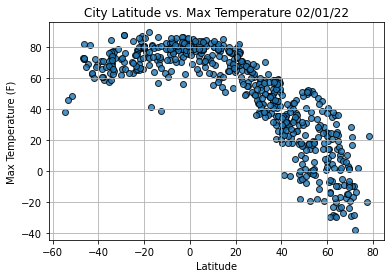

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

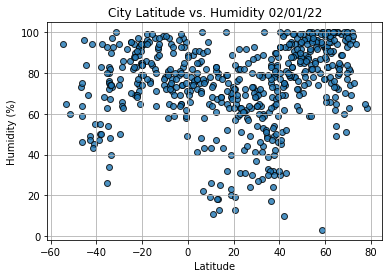

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

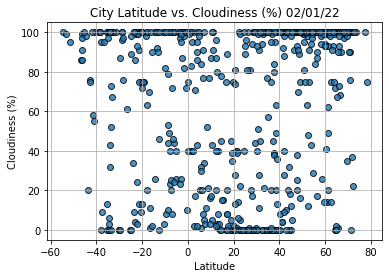

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

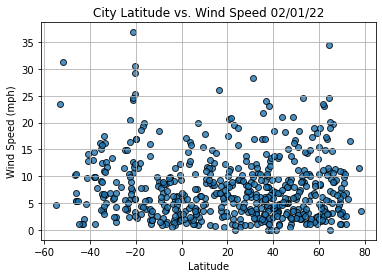

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()